# Loan Approval Prediction
Dataset downloaded from the hackathon organised by Analytics Vidhya https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

# Problem Statement
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Hypothesis Generation

- Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
- Income: Applicants with higher income should have more chances of loan approval
- Loan amount: If the loan amount is less, the chances of loan approval should be high
- Loan term: Loans with shorter time period should have higher chances of approval
- Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
- Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high


# Applying the Pipeline Of Machine Learnig Project
- 1. Data Analysis
- 2. Feature Engineering
- 3. Feature Selection
- 4. Model Building
- 5. Model Deploymnet (To be deployed later)

# 1. Data Analysis (EDA)

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the train and test dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# copy of original data
train_original = train.copy()
test_original = test.copy()

In [4]:
train.shape, test.shape

((614, 13), (367, 12))

In [5]:
# train test split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [6]:
# have look over train data 
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# have look over test Data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# Checking the null value in train and test data
# train data set
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# test data set
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

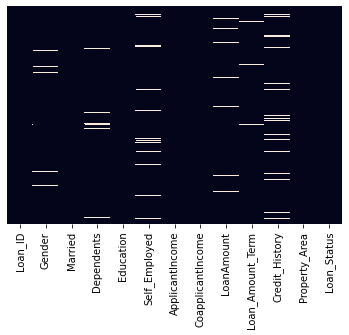

In [10]:
# vizualize 'train dataset' null value using heat-map
sns.heatmap(train.isnull(), yticklabels = False, cbar = False )

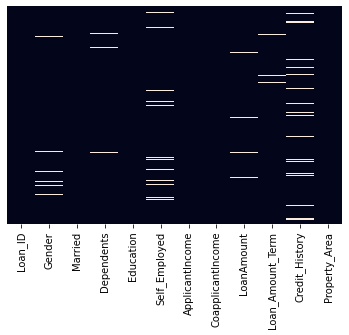

In [11]:
# vizualize 'test dataset' null value using heat-map
sns.heatmap(test.isnull(), yticklabels = False, cbar = False )

**Note**: From above graph it can be vizualise that there is lot of null value in our train and test dataset

**Note: ** So we have 13 feature and 614 rows in train dataset and 12 feature and 367 rows in test dataset, and train-test-split ratio of 63% and 37%.

In [12]:
# exploring the data types of train and test dataset
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

**Note: ** Three datatypes in dataset
- object
- int64
- float64

# Univariate Analysis
Analysing Each variable individually, the key fact is that only one variable is involved.


### Target variable

In [14]:
# target variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
# percentage distribution of 'Loan_Status'
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

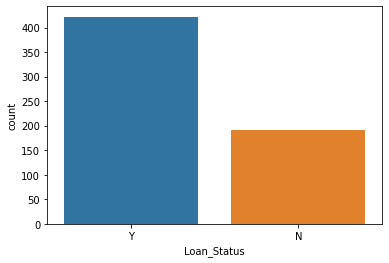

In [16]:
#plot to vizualise 
sns.countplot('Loan_Status', data = train)

# Independent Variable (Categorical)

### Gender

In [17]:
# Gender
train['Gender'].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

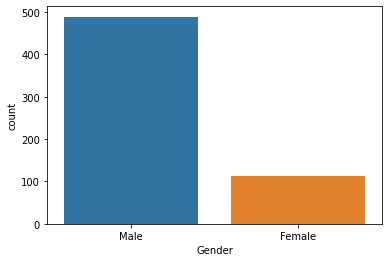

In [18]:
sns.countplot('Gender', data = train)

### Married

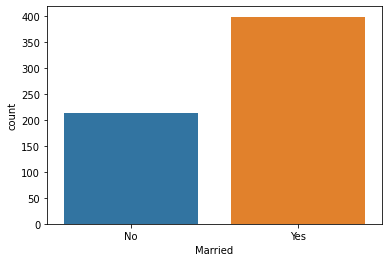

In [19]:
# Married
sns.countplot('Married', data = train)

### Self Employed

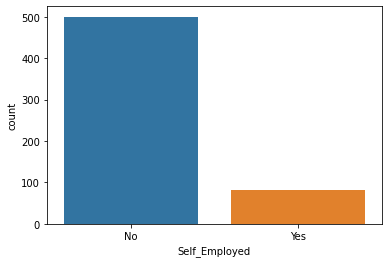

In [20]:
#Self_Employed
sns.countplot('Self_Employed', data = train)

In [21]:
train['Self_Employed'].value_counts(normalize = True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

### Credit History

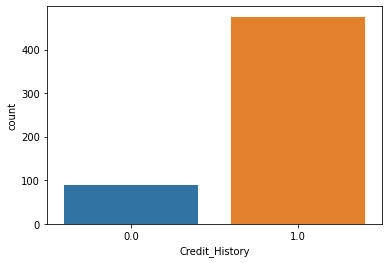

In [22]:
#Credit_History
sns.countplot('Credit_History', data = train)

In [23]:
train['Credit_History'].value_counts(normalize = True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

### Education

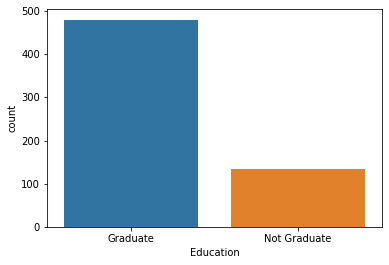

In [24]:
#Education
sns.countplot('Education', data = train)

In [25]:
train['Education'].value_counts(normalize = True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

So from the above plot and value count analysis it can be says that
- 81% applicant are male in dataset
- 65% appliant are married in dataset
- 15% applicants are self employed.
- 85% applicants have credit history.
- 80% applicants are Graduate.
 

# Ordinal Variable 

### Dependents

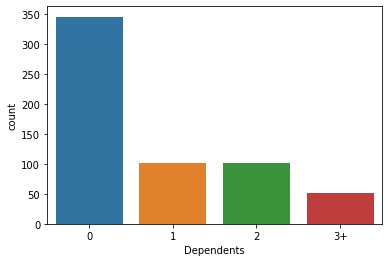

In [26]:
#Dependents
sns.countplot('Dependents', data = train)

### Property Area

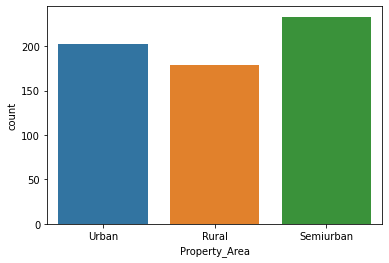

In [27]:
#Property_Area
sns.countplot('Property_Area' ,data = train)

From above it can be concluded that
- Most of the applicant have no any dependents
- Majority of the applicants belong from SemiUrban region

# Numerical Variable 

### Applicant Income

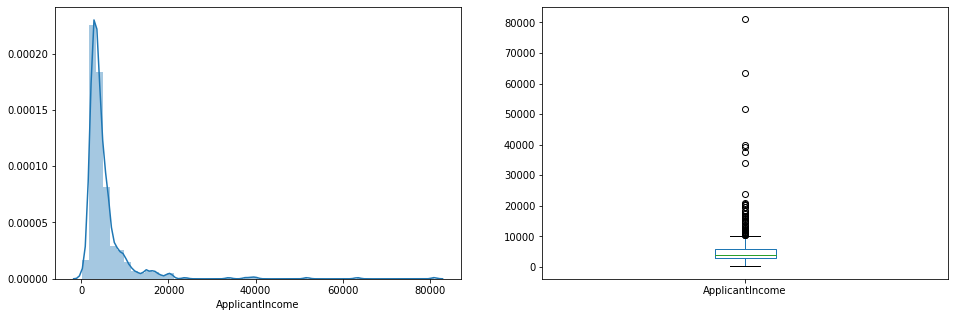

In [28]:
#ApplicantIncome
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

From Above it can be observe applicant income is towards left which means it is not normally distributed. Right skewed distribution.
and from boxplot it can be observe that there is lot of outliers.

### Coapplicant

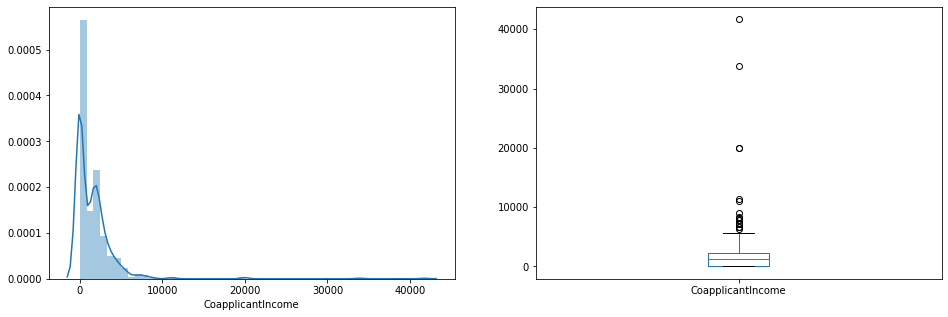

In [29]:
# Coapplicant income distribution
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Same analysis as in previous case

### Loan_Amount_Term

In [30]:
#Loan_Amount_Term
train['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [31]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

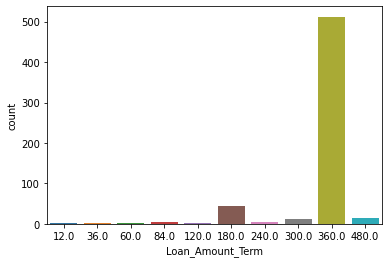

In [32]:
sns.countplot('Loan_Amount_Term', data = train)

Around 86% Loan term is of 360 month

# Bivariate Analysis
Exploring variable with respect to target variable and categorical Independent variables

## Categorical Independent Variable vs Target Variable

### Gender vs Loan_Status 

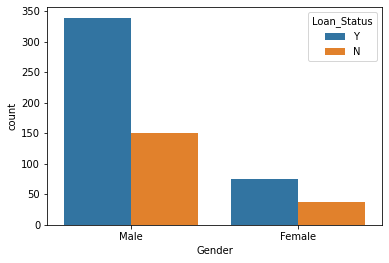

In [33]:
#Gender vs Loan_Status
sns.countplot(x="Gender",hue="Loan_Status",data=train)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


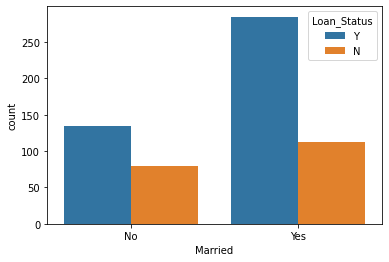

In [34]:
print(pd.crosstab(train['Married'],train['Loan_Status']))
sns.countplot('Married', hue ='Loan_Status', data = train)

### Dependents vs Loan_Status

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


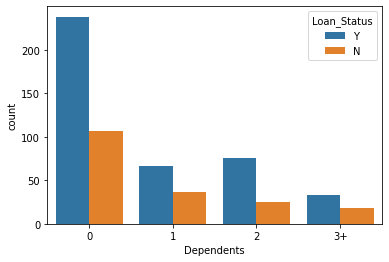

In [35]:
# Dependents vs Loan_Status
print(pd.crosstab(train['Dependents'], train['Loan_Status']))
sns.countplot('Dependents', hue ='Loan_Status', data = train)

### Education vs Loan_Status

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


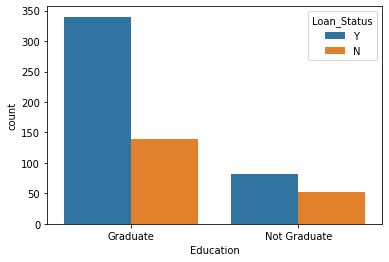

In [36]:
# Educatin vs Loan_Status
print(pd.crosstab(train['Education'],train['Loan_Status']))
sns.countplot('Education', hue ='Loan_Status', data = train)

### Self_Employed vs Loan_Status

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


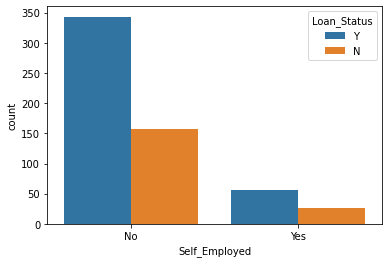

In [37]:
# Self_Employed vs Loan_Status
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))
sns.countplot('Self_Employed', hue ='Loan_Status', data = train)

### Credit_History vs Loan_Status

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


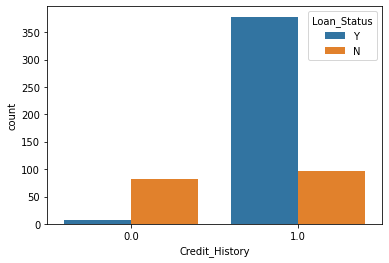

In [38]:
# Credit_History vs Loan_Status
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))
sns.countplot('Credit_History', hue ='Loan_Status', data = train)

### Property_Area vs Loan_Status

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


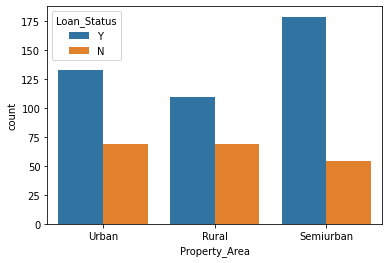

In [39]:
#Property_Area vs Loan_Status
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))
sns.countplot('Property_Area', hue ='Loan_Status', data = train)

From the above chart, it can be says that:
- proportion of male and female applicants is more or less same for both approved and unapproved loans
- proportion of married applicants is higher for the approved loans
- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
- there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- proportion of loans getting approved for graduates is higher compared to non-graduates
- it seems people with credit history as 1 are more likely to get their loans approved
- proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerica vs Target Variable

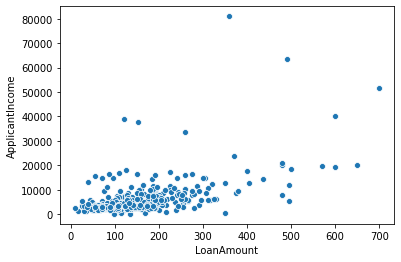

In [40]:
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=train)

# Assigning Flag to categorical variable 

In [41]:
# Gender
train_original['Gender'].unique() 

array(['Male', 'Female', nan], dtype=object)

In [42]:
train['Gender'] = train['Gender'].map({'Male':1,'Female':0})

In [43]:
# Married
train_original['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
train['Married'] = train['Married'].map({"Yes":1,"No":0})

In [45]:
# Dependents
train['Dependents'] = train['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [46]:
# Education
train['Education'] = train['Education'].map({"Graduate":1,"Not Graduate":0})

In [47]:
# Self Employed
train['Self_Employed'] = train['Self_Employed'].map({"Yes":1,"No":0})

In [48]:
# Property Area
train['Property_Area'] = train['Property_Area'].map({"Rural":1,"Semiurban":2,"Urban":3})

In [49]:
# Loan Status
train['Loan_Status'] = train['Loan_Status'].map({"Y":1,"N":0})

# Correlation
It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other.
Correlation values range between -1 and 1. There are two key components of a correlation value:
- magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
- sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.168347,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.024556,0.019857
Married,0.369612,1.000000,0.316592,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.002918,0.089280
Dependents,0.168347,0.316592,1.000000,-0.062254,0.048433,0.134625,0.031882,0.171972,-0.101388,-0.056637,-0.005676,-0.000760
Education,-0.049258,-0.014223,-0.062254,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.065243,0.085884
Self_Employed,-0.009829,0.001909,0.048433,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.031214,-0.002303
ApplicantIncome,0.053989,0.051332,0.134625,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.083946,0.077770,0.031882,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.106947,0.149519,0.171972,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,-0.101388,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,0.016337,0.004381,-0.056637,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678


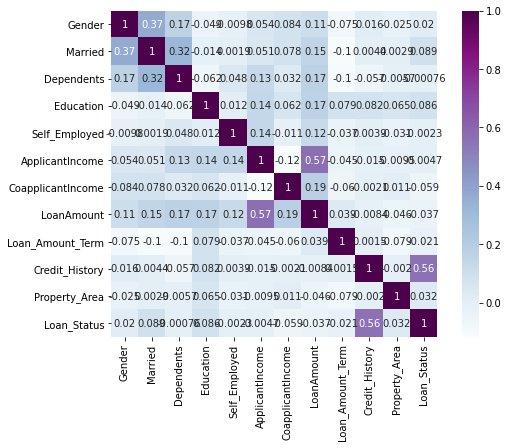

In [50]:
# Correlation Matrix
matrix = train.corr()
ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)
matrix

**Note: ** We see that the most correlated variables are
- Gender has highest correlation with Married
- Dependants has highest correlation with Married
- Self Employed has highest correlation with Applicant Income
- ApplicantIncome - LoanAmount with correlation coefficient of 0.57
- LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.
- Credit History is highly correlated with Loan Status 

# Data Preprocessing 
Transformation of Raw Data into understandable Format, in simple term we can say this is the process called Data Mining. 

# Missing Value And Outlier Treatment
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [51]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### As gender and Married are highly correlated, so filled missing value in Gender by using married feature

In [52]:
# Missing value in Gender columns for train data
train_original.loc[(train_original['Gender'].isnull()) & (train_original['Married']== 'Yes'),'Gender']= 'Male'
train_original.loc[(train_original['Gender'].isnull()) & (train_original['Married']== 'No'),'Gender']= 'Female'

In [53]:
train_original["Gender"].isnull().sum()

0

In [54]:
# Missing value in Gender columns for test data
test.loc[(test['Gender'].isnull()) & (test['Married'] == 'Yes'),'Gender']= 'Male'
test.loc[(test['Gender'].isnull()) & (test['Married']== 'No'),'Gender']= 'Female'

In [55]:
# Missing value in MArried columns for train data
train_original.loc[(train_original["Married"].isnull()) & (train_original["Gender"]=="Male"),"Married"]="Yes"
train_original.loc[(train_original["Married"].isnull()) & (train_original["Gender"]=="Female"),"Married"]="No"

In [56]:
train_original['Married'].isnull().sum()

0

### Dependent

In [57]:
# Dependent
train_original['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [58]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [59]:
# fill zero in place of missing value
train_original['Dependents']= train_original['Dependents'].fillna('0')
test['Dependents']= test['Dependents'].fillna('0')

In [60]:
test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [61]:
train_original['Dependents']= train_original['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})
test['Dependents']= test['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [62]:
# Label Encoder for dependents 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_original['Dependents']= le.fit_transform(train_original['Dependents'])
test['Dependents']= le.fit_transform(test['Dependents'])

### Self employed vs Education  are highly correlated missing value filled  

In [63]:
train_original['Self_Employed'].isnull().sum()

32

In [64]:
# Missing value in Self Employed columns for train data
train_original.loc[(train_original["Self_Employed"].isnull()) & (train_original["Education"]=="Graduate"),"Self_Employed"]="No"
train_original.loc[(train_original["Self_Employed"].isnull()) & (train_original["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [65]:
train_original['Self_Employed'].isnull().sum()

0

In [66]:
# Missing value in Self Employed columns for test data
test.loc[(test["Self_Employed"].isnull()) & (test["Education"]=="Graduate"),"Self_Employed"]="No"
test.loc[(test["Self_Employed"].isnull()) & (test["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [67]:
test['Self_Employed'].isnull().sum()

0

In [68]:
# check whether all the missing values are filled in the Train dataset
train_original.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Outlier treatment and Detection

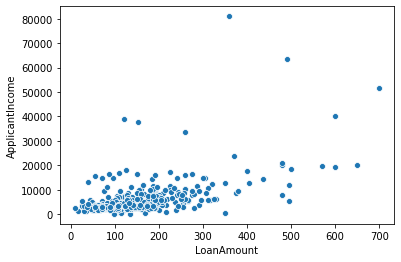

In [69]:
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=train_original)

From Above it can be seen there is lots of out lier

In [70]:
# Outlier Detection
train_original['LoanAmount'].quantile([0.1,0.2,0.3]) #checking for outliers

0.1     71.0
0.2     95.0
0.3    108.0
Name: LoanAmount, dtype: float64

In [71]:
# Outlier Detection
train_original['LoanAmount'].quantile([1.0,0.99,0.98])

1.00    700.00
0.99    496.36
0.98    443.92
Name: LoanAmount, dtype: float64

In [72]:
train_original.drop(train_original[train_original["LoanAmount"]>496.36].index,axis=0,inplace=True) #removing outliers

In [73]:
train_original.shape

(608, 13)

In [74]:
# We'll use fast_knn from impyute library to fill the missing values in loan amount 

#missing_data = train_original[["LoanAmount","ApplicantIncome"]]
#missing_data

#missing_data.isnull().sum()

#! pip install impyute

#import impyute as imp

#missing_data = imp.fast_knn(missing_data)

### LoanAmount

In [75]:
# Removing skewness in LoanAmount variable by log transformation
train_original['LoanAmount'] = np.log(train['LoanAmount'])
test['LoanAmount'] = np.log(test['LoanAmount'])

In [76]:
train_original['LoanAmount'] = train_original['LoanAmount'].fillna(train_original['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [77]:
train_original['LoanAmount'].isnull().sum(), test['LoanAmount'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Test')

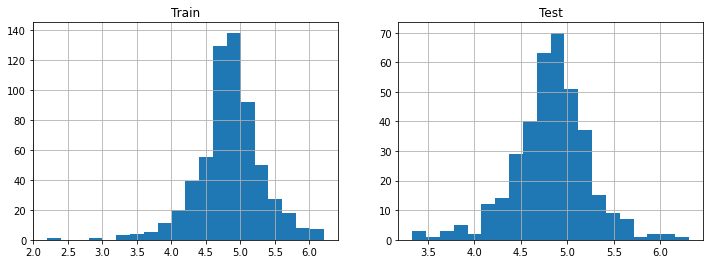

In [78]:
# after log transformation
ax1 = plt.subplot(121)
train_original['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [79]:
train_original['Loan_Amount_Term'] = train_original['Loan_Amount_Term'].fillna(360.0)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(360.0)

### Credit history and Loan Status are corelated so filled missing value using Loan Status

In [80]:
train_original.loc[(train_original["Credit_History"].isnull()) & (train_original["Loan_Status"]=="Y"),"Credit_History"]=1.0
train_original.loc[(train_original["Credit_History"].isnull()) & (train_original["Loan_Status"]=="N"),"Credit_History"]=0.0

In [81]:
test['Credit_History'] = test['Credit_History'].fillna(1.0)

# 2. Feature Engineering 

In [82]:
# combine Applicant Income and Coapplicant Income into a new variable
train_original['Total_Income'] = train_original['ApplicantIncome'] + train_original['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

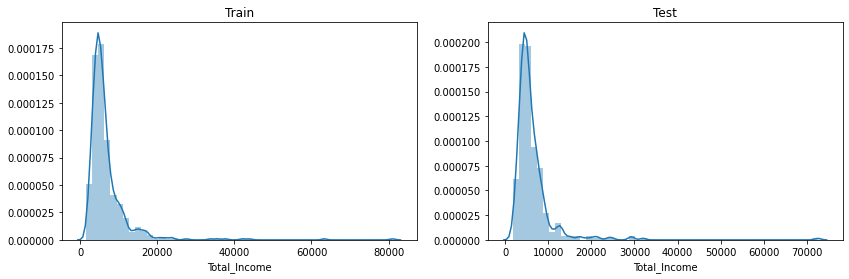

In [83]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_original['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

In [84]:
# log transformation
train_original['Total_Income_log'] = np.log(train_original['Total_Income'])
test['Total_Income_log']  =  np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

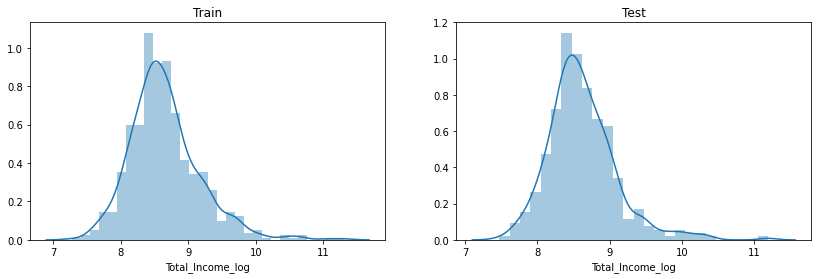

In [85]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_original['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. It is just an approximation of actual EMI.

In [86]:
# create EMI feature
train_original['EMI'] = (train_original['LoanAmount']*0.09*(1.09**train_original['Loan_Amount_Term']))/(1.09**(train_original['Loan_Amount_Term']-1))
test['EMI'] = (test['LoanAmount']*0.09*(1.09**test['Loan_Amount_Term']))/(1.09**(test['Loan_Amount_Term']-1))

Text(0.5, 1.0, 'Test')

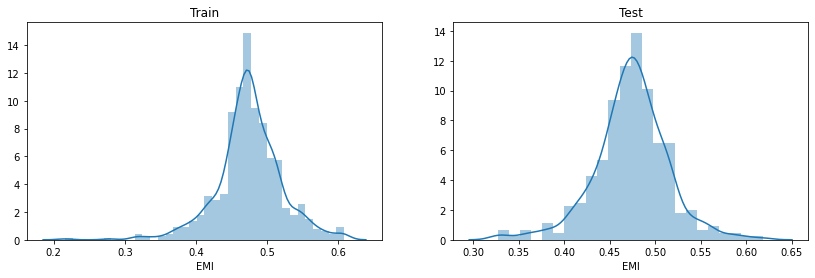

In [87]:
# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_original['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

# 3. Feature Selection

In [88]:
# drop the variables
train_original = train_original.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income','Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Total_Income','Loan_Amount_Term'], axis=1)

In [89]:
train_original.isnull().sum(), test.isnull().sum() 

(Loan_ID             0
 Gender              0
 Married             0
 Dependents          0
 Education           0
 Self_Employed       0
 Credit_History      0
 Property_Area       0
 Loan_Status         0
 Total_Income_log    0
 EMI                 0
 dtype: int64, Loan_ID             0
 Gender              0
 Married             0
 Dependents          0
 Education           0
 Self_Employed       0
 Credit_History      0
 Property_Area       0
 Total_Income_log    0
 EMI                 0
 dtype: int64)

We can see that all the missing values have been filled in the Train dataset as well as test dataset.

In [90]:
#dropping loan id
train_df = train_original.drop(["Loan_ID"],axis=1) 

In [91]:
train_df = pd.get_dummies(train_df,drop_first=True) # one hot encoding

In [92]:
train_df.drop(['Education_Not Graduate'],axis = 1)

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,1.0,8.674026,0.475215,1,0,0,0,1,1
1,1,1.0,8.714568,0.475984,1,1,0,0,0,0
2,0,1.0,8.006368,0.411005,1,1,1,0,1,1
3,0,1.0,8.505323,0.469653,1,1,0,0,1,1
4,0,1.0,8.699515,0.485473,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,7.972466,0.418169,0,0,0,0,0,1
610,3,1.0,8.320205,0.361879,1,1,0,0,0,1
611,1,1.0,9.025456,0.542826,1,1,0,0,1,1
612,2,1.0,8.933664,0.513172,1,1,0,0,1,1


### We are not using train test split as the dataset is too small so we'll use complete dataset for training

In [93]:
X_train = train_df.drop(["Loan_Status_Y", "Education_Not Graduate",'Self_Employed_Yes', 'Property_Area_Urban'],axis=1)
y_train = train_df["Loan_Status_Y"]
#X_test=test.drop(["Loan_ID"],axis=1)

In [94]:
test_df = test.drop(["Loan_ID"],axis=1)
X_test=pd.get_dummies(test_df,drop_first=True)


### Removing "Education_Not Graduate", 'Self_Employed_Yes','Property_Area_Urban' from test data as well

In [95]:
X_test = X_test.drop(["Education_Not Graduate", 'Self_Employed_Yes','Property_Area_Urban'],axis=1)

### Finally lets have Final look over X_train, y_train, X_test shape

In [96]:
X_train.shape,y_train.shape, X_test.shape

((608, 7), (608,), (367, 7))

In [97]:
X_train.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Property_Area_Semiurban
0,0,1.0,8.674026,0.475215,1,0,0
1,1,1.0,8.714568,0.475984,1,1,0
2,0,1.0,8.006368,0.411005,1,1,0
3,0,1.0,8.505323,0.469653,1,1,0
4,0,1.0,8.699515,0.485473,1,0,0


In [98]:
X_test.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Property_Area_Semiurban
0,0,1.0,8.651724,0.461117,1,1,0
1,1,1.0,8.428581,0.474439,1,1,0
2,2,1.0,8.824678,0.523612,1,1,0
3,2,1.0,8.494129,0.451767,1,1,0
4,0,1.0,8.094378,0.427393,1,0,0


# 4. Model Selection

In [99]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 1. Logistic Regression

In [100]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, n_jobs=1, scoring=scoring)
print(score)

[0.8442623  0.80327869 0.79508197 0.87603306 0.85123967]


In [101]:
round(np.mean(score)*100, 2)

83.4

# 2. K-Nearest Neighbour

In [102]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [103]:
clf = KNeighborsClassifier(n_neighbors = 14)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73770492 0.85245902 0.86885246 0.7704918  0.86885246 0.90163934
 0.7704918  0.78688525 0.83333333 0.83333333]


In [104]:
# kNN Score
round(np.mean(score)*100, 2)

82.24

# 3. Decision Tree

In [105]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.73770492 0.73770492 0.7704918  0.75409836 0.75409836 0.68852459
 0.63934426 0.68852459 0.78333333 0.76666667]


In [106]:
# decision tree Score
round(np.mean(score)*100, 2)

73.2

# 4. Random Forest

In [107]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.70491803 0.80327869 0.81967213 0.75409836 0.83606557 0.83606557
 0.72131148 0.70491803 0.9        0.75      ]


In [108]:
# Random Forest Score
round(np.mean(score)*100, 2)

78.3

# 5. Naive Bayes

In [109]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.78688525 0.8852459  0.90163934
 0.7704918  0.78688525 0.9        0.81666667]


In [110]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

83.23

# 6. Support Vector Classifier

In [111]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.78688525 0.90163934 0.90163934
 0.7704918  0.78688525 0.9        0.81666667]


In [112]:
round(np.mean(score)*100,2)

83.4

In [113]:
# Artificial Neural Network

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [115]:
#initailsing 
classifier = Sequential()

# Adding input leyer and First h layer
classifier.add(Dense(output_dim=5,init = 'he_uniform',activation = 'relu', input_dim=7))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 7, init = 'he_uniform',activation='relu'))

#Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.35, batch_size = 8, nb_epoch = 300)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=5, kernel_initializer="he_uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="he_uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 395 samples, validate on 213 samples
Epoch 1/300
395/395 [==============================] - 0s 883us/step - loss: 1.0780 - accuracy: 0.3038 - val_loss: 0.9045 - val_accuracy: 0.3286
Epoch 2/300
395/395 [==============================] - 0s 174us/step - loss: 0.8537 - accuracy: 0.3063 - val_loss: 0.7841 - val_accuracy: 0.3897
Epoch 3/300
395/395 [==============================] - 0s 177us/step - loss: 0.7629 - accuracy: 0.3494 - val_loss: 0.7288 - val_accuracy: 0.4413
Epoch 4/300
395/395 [==============================] - 0s 206us/step - loss: 0.7165 - accuracy: 0.4228 - val_loss: 0.6977 - val_accuracy: 0.4695
Epoch 5/300
395/395 [==============================] - 0s 171us/step - loss: 0.6885 - accuracy: 0.4861 - val_loss: 0.6788 - val_accuracy: 0.5540
Epoch 6/300
395/395 [==============================] - 0s 176us/step - loss: 0.6696 - accuracy: 0.6076 - val_loss: 0.6671 - val_accuracy: 0.6338
Epoch 7/300
395/395 [==============================] - 0s 175us/step - loss: 0.6566 

**Note**: From Above 6 Algorithms and one Artificial Neural Network(83.04%) it can be seen that Logistic Regression and SVC give mean score of 83.4% so we can use either of them to Test our result.

## Testing 

In [116]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
#test_data = test.drop( "Loan_ID", axis=1).copy()
prediction = clf.predict(X_test)

### Preparing For the Submission

In [117]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": prediction
    })

In [118]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [119]:
submission.to_csv('submission.csv', index=False)

In [120]:
submission = pd.read_csv('submission.csv')
submission[20:50]

,Loan_ID,Loan_Status
20,LP001121,Y
21,LP001124,Y
22,LP001128,Y
23,LP001135,Y
24,LP001149,Y
25,LP001153,N
26,LP001163,Y
27,LP001169,Y
28,LP001174,Y
29,LP001176,Y


We can Improve our model accuracy by spending some time in 
- Hyperparameter Tuning
- Feature Engineering (Require some Domain Knowledge for that things).
- Creating new Feature by observing Some Pattern.


If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/ayush-kumar-26957b189/) or [GitHub Pages](https://github.com/ayushkesh).
- Please fork this page in your github and Let me know if you end up with accuracy more than the above predicted.

### Happy Learning **
 **ML FOR ALL**